##**Problem Statement and Motivation**

The goal of this project is to detect the presence of safety gear worn by construction workers.

The task is formulated as an object detection problem using computer vision techniques.

**The detection system focuses on three classes:**

1. Person

2. Hardhat

3. Safety Vest

The dataset used for training and evaluation consists of construction-site images downloaded from Kaggle.

Each image in the dataset includes bounding box annotations for the target objects.

This project aims to support automated monitoring of safety compliance at construction sites.

In [ ]:
!pip install kaggle opencv-python-headless --quiet

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"fatimanawab48","key":"bfec1a6c6b01b44a3bb0786474b358d3"}'}

In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

In [ ]:
!kaggle datasets download -d muhammetzahitaydn/hardhat-vest-dataset-v3 -p ./dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/muhammetzahitaydn/hardhat-vest-dataset-v3
License(s): CC0-1.0
100% 4.20G/4.21G [01:36<00:00, 20.0MB/s]
100% 4.21G/4.21G [01:36<00:00, 46.7MB/s]


###**Dataset Description (size, classes, examples)**

In [ ]:
import os

DATASET_PATH = './dataset'
print("Training images:", len(os.listdir(f"{DATASET_PATH}/images/train")))
print("Validation images:", len(os.listdir(f"{DATASET_PATH}/images/val")))
print("Test images:", len(os.listdir(f"{DATASET_PATH}/images/test")))

Training images: 17248
Validation images: 2438
Test images: 2455


###**Dataset YAML generation**

In [ ]:
import os

# Define the content for hardhat.yaml
DATASET_PATH = './dataset'
CLASSES = ['hardhat', 'vest', 'person']
NUM_CLASSES = len(CLASSES)

yaml_content = f"""path: {DATASET_PATH}
train: images/train
val: images/val
nc: {NUM_CLASSES}
names:
"""
for i, class_name in enumerate(CLASSES):
    yaml_content += f"  {i}: {class_name}\n"

# Define the path for the hardhat.yaml file
yaml_file_path = os.path.join(DATASET_PATH, 'hardhat.yaml')

# Write the content to the file
with open(yaml_file_path, 'w') as f:
    f.write(yaml_content)

print(f"Created hardhat.yaml at: {yaml_file_path}")
print("Content:\n" + yaml_content)

Created hardhat.yaml at: ./dataset/hardhat.yaml
Content:
path: ./dataset
train: images/train
val: images/val
nc: 3
names:
  0: hardhat
  1: vest
  2: person



###**Model Architecture and Training Setup**

In [ ]:
!pip install ultralytics --quiet

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

print("YOLOv8n model loaded successfully for fine-tuning.")

YOLOv8n model loaded successfully for fine-tuning.


In [ ]:
results = model.train(data=yaml_file_path, epochs=1, imgsz=200, batch=10)
print("Model training initiated successfully.")

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./dataset/hardhat.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=200, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

In [12]:

# Load your trained model (best weights)
model = YOLO("/content/runs/detect/train2/weights/best.pt")
# Path to your dataset YAML file
yaml_path = "/content/dataset/hardhat.yaml"
# Check file exists
assert os.path.exists(yaml_path)

###**Validation & Testing**

In [13]:
# Validate on Validation Set
metrics = model.val(data=yaml_path)
print("Validation Metrics:")
print(metrics)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1572.3±624.4 MB/s, size: 306.1 KB)
val: Scanning /content/dataset/labels/val.cache... 2438 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2438/2438 1.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 153/153 1.1it/s 2:14
                   all       2438      21032      0.632      0.463      0.509      0.258
               hardhat       1782       6586       0.57      0.727      0.708      0.384
                  vest        406        870      0.642      0.409      0.502      0.253
                person        712      13576      0.684      0.252      0.317      0.136
Speed: 0.3ms preprocess, 42.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/val
Validatio


image 1/1 /content/images.jpg: 128x224 3 hardhats, 3 vests, 356.6ms
Speed: 13.3ms preprocess, 356.6ms inference, 1.6ms postprocess per image at shape (1, 3, 128, 224)


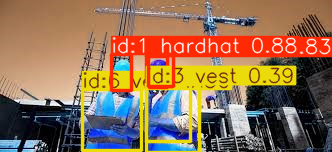

In [24]:
import cv2
from google.colab.patches import cv2_imshow

# Perform inference on the image
results = model.predict(source='/content/images.jpg', conf=0.25)

# Display the results
for r in results:
    im_array = r.plot()
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    cv2_imshow(im_rgb)

TASK 2:

In [16]:
model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)
print("Model loaded successfully!")

Model loaded successfully!


In [17]:
# Run inference on unseen images
image_source = "/content/dataset/images/val"  # folder or image
results = model.predict(source=image_source, conf=0.5, save=True)
print("Prediction done! Check runs/predict/ folder for results.")


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2438 /content/dataset/images/val/000006.jpg: 224x224 7 persons, 45.7ms
image 2/2438 /content/dataset/images/val/000011.jpg: 224x224 16 hardhats, 38.7ms
image 3/2438 /content/dataset/images/val/000013.jpg: 224x224 1 hardhat, 38.8ms
image 4/2438 /content/dataset/images/val/000024.jpg: 224x224 8 hardhats, 2 persons, 39.1ms
image 5/2438 /content/dataset/images/val/000058.jpg: 224x224 3 hardhats, 48.9ms
image 6/2438 /content/dataset/images/val/000068.

Tracking and Segmentation

In [18]:
# TRACKING (Object Tracking across frames)
import time
video_source = "/content/video-from-rawpixel-id-17988568-sd.mp4"

start_time = time.time()
results_track = model.track(
    source=video_source,
    conf=0.5,
    tracker="bytetrack.yaml",   # Built-in tracker (options: bytetrack.yaml, botsort.yaml)
    save=True,
    show=False
)
end_time = time.time()

print("Tracking done! Check runs/track/ folder for annotated video.")

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 248ms
Prepared 1 package in 79ms
Installed 1 package in 2ms
 + lap==0.5.12

requirements: AutoUpdate success ✅ 1.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/300) /content/video-from-rawpixel-id-17988568-sd.mp4: 128x224 1 hardhat, 1 vest, 3

In [19]:
from ultralytics import YOLO

In [20]:
image_source = "/content/dataset/images/val"
seg_model = YOLO("yolov8n-seg.pt")
seg_model.predict(source=image_source, conf=0.5, save=True)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2438 /content/dataset/images/val/000006.jpg: 640x640 5 persons, 456.8ms
image 2/2438 /content/dataset/images/val/000011.jpg: 640x640 11 persons, 534.3ms
image 3/2438 /content/dataset/images/val/000013.jpg: 640x640 1 person, 529.4ms
image 4/2438 /content/dataset/images/val/000024.jpg: 640x640 7 persons, 516.5ms
image 5/2438 /content/dataset/images/val/000058.jpg: 640x640 4 persons, 516.1ms
image 6/2438 /content/dataset/images/val/000068.jpg: 640x6

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [22]:
# PERFORMANCE (FPS Measurement)

processing_time = end_time - start_time
fps = len(results_track) / processing_time if processing_time > 0 else 0
print(f"Approximate FPS: {fps:.2f}")

Approximate FPS: 16.99


In [23]:
#  output paths
print("\n Outputs saved to:")
print("Predictions → runs/predict/")
print("Tracking → runs/track/")


 Outputs saved to:
Predictions → runs/predict/
Tracking → runs/track/
